# Importation des bibliothèques

In [ ]:
from google.colab import drive # pour importer le dataset depuis drive
import pandas as pd # pr manipuler les dataframes
import numpy as np # pour créer des matrices
import matplotlib.pyplot as plt # pour tracer des graphiques
import seaborn as sns # pour la visualisation de la data

# Chargement du dataset

In [ ]:
drive.mount('/content/drive')
dataset = pd.read_csv('/content/drive/MyDrive/Projet-MachineLearning/dataset.csv') # chemin vers le dataset
print(dataset.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
   Bankrupt?   ROA(C) before interest and depreciation before interest  \
0          1                                           0.370594          
1          1                                           0.464291          
2          1                                           0.426071          
3          1                                           0.399844          
4          1                                           0.465022          

    ROA(A) before interest and % after tax  \
0                                 0.424389   
1                                 0.538214   
2                                 0.499019   
3                                 0.451265   
4                                 0.538432   

    ROA(B) before interest and depreciation after tax  \
0                                           0.405750    
1                                  

# Comprendre le dataset

In [ ]:
# Pour connaitre le taille du dataset
print(dataset.shape)
#print(dataset.columns)

(6819, 96)


Il s'agit d'un gros dataset (96 features)

# Séparation des features et de la cible

In [ ]:
X = dataset.drop('Bankrupt?', axis=1)
y = dataset['Bankrupt?']
print(y.head())

0    1
1    1
2    1
3    1
4    1
Name: Bankrupt?, dtype: int64


# Analyse des données

<ipython-input-95-926b75f218dc>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Bankrupt?', data=dataset, palette='RdBu_r')


<Axes: xlabel='Bankrupt?', ylabel='count'>

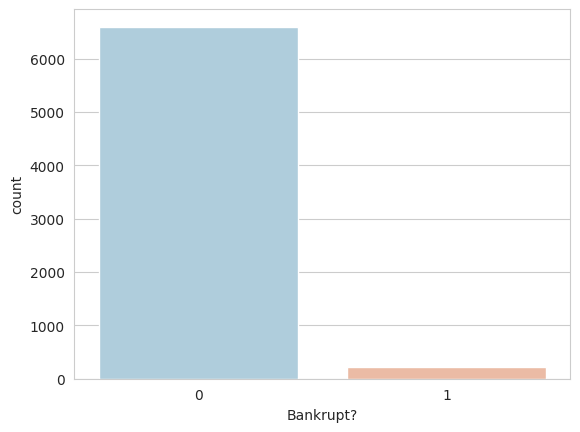

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='Bankrupt?', data=dataset, palette='RdBu_r')


On remarque ici que la majorité des entreprises présentes dans le dataset ne sont pas en faillite , environ 6600 pour environ 200 entreprises en faillite

In [ ]:
print(dataset.columns)

Index(['Bankrupt?', ' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Operating Gross Margin', ' Realized Sales Gross Margin',
       ' Operating Profit Rate', ' Pre-tax net Interest Rate',
       ' After-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)', ' Operating Expense Rate',
       ' Research and development expense rate', ' Cash flow rate',
       ' Interest-bearing debt interest rate', ' Tax rate (A)',
       ' Net Value Per Share (B)', ' Net Value Per Share (A)',
       ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons',
       ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)',
       ' Operating Profit Per Share (Yuan ¥)',
       ' Per Share Net profit before tax (Yuan ¥)',
       ' Realized Sales Gross Profit Growth Rate',
       ' Operating Profit

<Axes: xlabel=' Net Value Per Share (A)', ylabel='Count'>

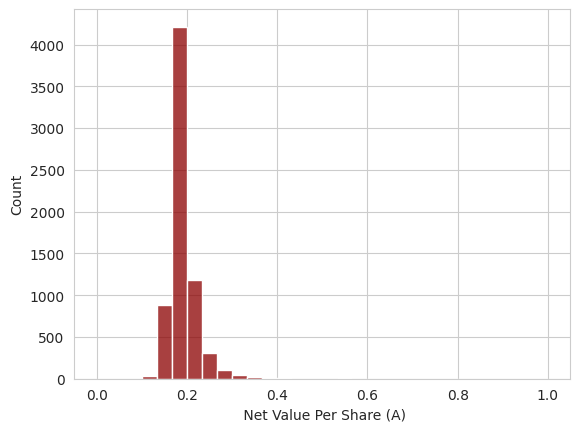

In [ ]:
sns.histplot(dataset[' Net Value Per Share (A)'], kde=False, color="darkred", bins=30)

In [ ]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

Je vais maintenant supprimer les colonnes identiques

In [ ]:
dataset = dataset.drop([' Net Value Per Share (B)', ' Net Value Per Share (C)'], axis=1)
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 94 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

Les données sont complètes

<Axes: >

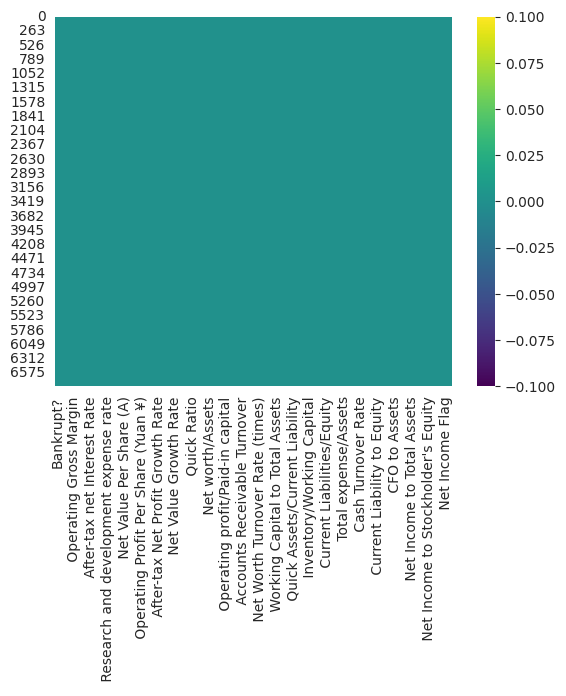

In [ ]:
sns.heatmap(dataset.isnull(), cmap='viridis')

On peut ainsi vérifier graphiquement qu'il ne manque aucune données

# Separation des données train et test

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset.drop('Bankrupt?',axis=1),
                                                    dataset['Bankrupt?'], test_size=0.10,random_state=101)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6137, 93)
(682, 93)
(6137,)
(682,)


# Regression logitisque pour la classification

In [ ]:
from sklearn.linear_model import LogisticRegression
Logismodel = LogisticRegression(solver='liblinear')
# entrainement
Logismodel.fit(X_train,y_train) # calcul les différents teta du modèles (fonction sigmoide)

LogisticRegression(solver='liblinear')

# Evaluation

In [ ]:
predictions = Logismodel.predict(X_test)
from sklearn.metrics import classification_report #rapport de classification
print(classification_report(y_test,predictions)) # on compte les valeurs réelles et les prédictions

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       660
           1       0.00      0.00      0.00        22

    accuracy                           0.96       682
   macro avg       0.48      0.50      0.49       682
weighted avg       0.94      0.96      0.95       682



Le modèle n'est parvenu à prédire aucune entreprise en faillite, 2 possibilités : Sois mon code est mauvais (très propable), sois mon dataset contient trop peu d'entreprise en faillite pour l'entrainement du modèle. Je vais reesayer de prédire cela avec des arbres de décisions.  

In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,predictions))
tn, tp, fn, fp = confusion_matrix(y_test,predictions).ravel()
print(tn, tp, fn, fp)

[[658   2]
 [ 22   0]]
658 2 22 0


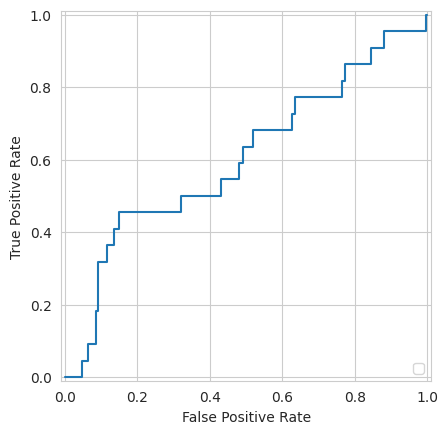

In [ ]:
from sklearn.metrics import RocCurveDisplay
fpr, tpr, thresholds = roc_curve(y_test, Logismodel.predict_proba(X_test)[:, 1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
plt.show()

Essayer -> Forêts aléatoires (Random Forests) ou Arbres de décision (Decision Trees) ou reseau neuronne

